# NFL Predictions

### Background Information

The NFL is the most watched sport in America and with this years season set to start on Thursday, September 8, 2022, I wanted to train, test and run a model that would be able to predict wins and losses for each team based on previous results and a variety of stats compiled for each team on a game-by-game basis as well as season totals. There has to be some sort of variable that all of the great teams have in common whether it be salary cap based, performance based or predicted rankings for players and teams. We are trying to find a highly effective and efficient way to win more games and assemble a premier team year in and year out.

### The Dataset

I am using a dataset titled ‘NFL Team Stats 2002-2021 (ESPN)’ that was scraped from ESPN containing 5357 rows and 39 columns. I will need to clean the data, find and replace null or missing values, rename columns, combine columns and determine the most important feature variables. Then, calculate overall win/loss and win percentage for each team based on the home/away results in the dataset. I will also be sorting the data by each year as well as by each team in order to properly run statistical analysis on both seasonal and team-by-team basis.

### Modeling Techniques

Data visualization will be important for understanding trends in the data, especially for people who do not have a great knowledge of football and what each statistic means. Using seaborn and matplotlib for regression and linear graphs, pie charts and others will provide quality visuals. Supervised learning will be utilized in the form of similarity models, random forests, support vector machines (SVMs) and gradient boosting. Dimensionality reduction will be key in eliminating some of the 39 columns.

### Challenges

Some of the challenges faced in this prediction would include off season acquisitions, retiring players and players who got injured either before or after the season starts.  For further evaluation, creating a better model for prediction would be to use player and team rankings provided by a variety of sources. Determining the efficiency with player rankings incorporated would lessen or even eliminate a lot of the challenges faced. You can also add a player salary variable to check for positional contract trends impact on winning percentage.

### Usefulness

Ways that this project could be useful would be for sports betting, fantasy football and general managers. Being able to fit the right blend of players together to create a team mathematically proven to have the best chance of succeeding would give teams a blueprint of what's currently winning as well as determine weaknesses that need to be accounted for is invaluable information. It will need to be adjusted every year to account for trends with play style. 


## Loading the necessary libraries

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

from scipy.signal import savgol_filter
import statsmodels.api as sm
from statsmodels.tools import add_constant
from itertools import combinations

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,6)})

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!conda install -c conda-forge jupyter_contrib_nbextensions

## Loading the data

In [2]:
url = 'https://raw.githubusercontent.com/RyanSaul85/NFL_Predictions/main/nfl_team_stats_2002-2021.csv'

df = pd.read_csv(url)

print('The DataFrame Shape is: {}'.format(df.shape))

df.head()

The DataFrame Shape is: (5357, 39)


,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,comp_att_away,comp_att_home,sacks_away,sacks_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,penalties_away,penalties_home,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32,32:28,16,13
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,242,73,142,266,384,24-30,26-39,3-17,4-29,14,32,1,1,0,2,1,3,10-90,10-82,0-9,0-8,17,18,2,0,21:06,39:08,37,31
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,288,140,80,368,368,16-28,20-33,1-6,1-9,33,26,1,1,2,1,3,2,8-52,4-33,0-7,0-6,17,17,0,0,31:31,28:29,23,27
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,167,241,36,401,203,15-19,18-31,1-0,4-31,45,13,0,0,0,1,0,1,4-39,9-57,0-7,0-5,11,15,0,0,37:48,22:12,34,6
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,352,194,59,470,411,20-29,28-40,0-0,1-7,30,20,0,1,1,0,1,1,9-87,4-38,0-10,0-10,20,17,0,0,30:16,29:44,40,39


## Analyzing and cleaning the data

In [3]:
df.describe()

,first_downs_away,first_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,drives_away,drives_home,def_st_td_away,def_st_td_home,score_away,score_home
count,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000
mean,19.026134,19.948105,221.804555,227.566922,110.445399,117.732873,332.249953,345.299795,26.603136,27.669778,0.637297,0.635617,0.954825,0.900691,1.592122,1.536308,12.275714,12.211126,0.327982,0.344969,21.148217,23.416464
std,5.085166,4.991284,79.214403,77.920508,50.753058,52.052181,86.603858,83.863821,7.879202,7.827500,0.810484,0.798702,1.020063,1.001788,1.332914,1.324370,2.607358,2.510777,0.785979,0.808665,10.109726,10.323772
min,3.000000,3.000000,-7.000000,6.000000,-18.000000,-3.000000,26.000000,77.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,17.000000,165.000000,173.000000,74.000000,81.000000,273.000000,288.000000,21.000000,22.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,11.000000,11.000000,0.000000,0.000000,14.000000,16.000000
50%,19.000000,20.000000,219.000000,223.000000,103.000000,111.000000,332.000000,344.000000,26.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,12.000000,12.000000,0.000000,0.000000,21.000000,23.000000
75%,22.000000,23.000000,275.000000,278.000000,139.000000,148.000000,391.000000,401.000000,32.000000,33.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,14.000000,13.000000,0.000000,0.000000,28.000000,30.000000
max,37.000000,40.000000,516.000000,522.000000,404.000000,378.000000,643.000000,653.000000,57.000000,60.000000,5.000000,4.000000,6.000000,6.000000,8.000000,7.000000,26.000000,25.000000,6.000000,6.000000,59.000000,62.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357 entries, 0 to 5356
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   5357 non-null   object
 1   away                   5357 non-null   object
 2   home                   5357 non-null   object
 3   first_downs_away       5357 non-null   int64 
 4   first_downs_home       5357 non-null   int64 
 5   third_downs_away       5357 non-null   object
 6   third_downs_home       5357 non-null   object
 7   fourth_downs_away      5357 non-null   object
 8   fourth_downs_home      5357 non-null   object
 9   passing_yards_away     5357 non-null   int64 
 10  passing_yards_home     5357 non-null   int64 
 11  rushing_yards_away     5357 non-null   int64 
 12  rushing_yards_home     5357 non-null   int64 
 13  total_yards_away       5357 non-null   int64 
 14  total_yards_home       5357 non-null   int64 
 15  comp_att_away        

**Necessary cleaning**

I will rename all columns with appropriate abbreviations to make the notebook cleaner.

All columns with the two numbers in a specified cell will be split at the (-), put in separate columns and a percentage will be calculated. If there is a 0 in the denominator, there were no attempts. This only appears when there are no fourth down attempts.

The possession_home and possession_away will also be calculated as a percentage by dividing each respective value by 60 mins (total game time).

In [5]:
#renaming the columns

df.rename(columns = {'away':'A', 
                     'home':'H', 
                     'first_downs_away': 'first_downs_A', 
                     'first_downs_home': 'first_downs_H', 
                     'third_downs_away': 'third_downs_A', 
                     'third_downs_home': 'third_downs_H', 
                     'fourth_downs_away': 'fourth_downs_A', 
                     'fourth_downs_home': 'fourth_downs_H', 
                     'passing_yards_away': 'pass_yds_A', 
                     'passing_yards_home': 'pass_yds_H', 
                     'rushing_yards_away': 'rush_yds_A', 
                     'rushing_yards_home': 'rush_yds_H', 
                     'total_yards_away': 'total_yds_A', 
                     'total_yards_home': 'total_yds_H', 
                     'comp_att_away': 'comp_att_A', 
                     'comp_att_home': 'comp_att_H', 
                     'sacks_away': 'sacks_A', 
                     'sacks_home': 'sacks_H', 
                     'rushing_attempts_away': 'rush_att_A', 
                     'rushing_attempts_home': 'rush_att_H', 
                     'fumbles_away': 'fumb_A', 
                     'fumbles_home': 'fumb_H', 
                     'int_away': 'int_A', 
                     'int_home': 'int_H', 
                     'turnovers_away': 'to_A', 
                     'turnovers_home': 'to_H', 
                     'penalties_away': 'pen_A', 
                     'penalties_home': 'pen_H', 
                     'redzone_away': 'rz_A', 
                     'redzone_home': 'rz_H', 
                     'drives_away': 'drives_A', 
                     'drives_home': 'drives_H', 
                     'def_st_td_away': 'dst_td_A', 
                     'def_st_td_home': 'dst_td_H', 
                     'possession_away': 'poss_A', 
                     'possession_home': 'poss_H', 
                     'score_away': 'score_A', 
                     'score_home': 'score_H'}, 
                    inplace=True)
          
df.head()

,date,A,H,first_downs_A,first_downs_H,third_downs_A,third_downs_H,fourth_downs_A,fourth_downs_H,pass_yds_A,pass_yds_H,rush_yds_A,rush_yds_H,total_yds_A,total_yds_H,comp_att_A,comp_att_H,sacks_A,sacks_H,rush_att_A,rush_att_H,fumb_A,fumb_H,int_A,int_H,to_A,to_H,pen_A,pen_H,rz_A,rz_H,drives_A,drives_H,dst_td_A,dst_td_H,poss_A,poss_H,score_A,score_H
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32,32:28,16,13
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,242,73,142,266,384,24-30,26-39,3-17,4-29,14,32,1,1,0,2,1,3,10-90,10-82,0-9,0-8,17,18,2,0,21:06,39:08,37,31
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,288,140,80,368,368,16-28,20-33,1-6,1-9,33,26,1,1,2,1,3,2,8-52,4-33,0-7,0-6,17,17,0,0,31:31,28:29,23,27
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,167,241,36,401,203,15-19,18-31,1-0,4-31,45,13,0,0,0,1,0,1,4-39,9-57,0-7,0-5,11,15,0,0,37:48,22:12,34,6
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,352,194,59,470,411,20-29,28-40,0-0,1-7,30,20,0,1,1,0,1,1,9-87,4-38,0-10,0-10,20,17,0,0,30:16,29:44,40,39


In [6]:
# Splitting the columns with #-# by the (-) and creating new columns for converted (con), 
# completed (com), attempts (att) and percentage successful (pct)

df[['third_downs_con_A', 'third_downs_att_A']] = df['third_downs_A'].str.split('-', 1, expand=True)
df[['third_downs_con_H', 'third_downs_att_H']] = df['third_downs_H'].str.split('-', 1, expand=True)
df[['fourth_downs_con_A', 'fourth_downs_att_A']] = df['fourth_downs_A'].str.split('-', 1, expand=True)
df[['fourth_downs_con_H', 'fourth_downs_att_H']] = df['fourth_downs_H'].str.split('-', 1, expand=True)
df[['pass_comp_A', 'pass_att_A']] = df['comp_att_A'].str.split('-', 1, expand=True)
df[['pass_comp_H', 'pass_att_H']] = df['comp_att_H'].str.split('-', 1, expand=True)
df[['sack_A', 'sack_yards_A']] = df['sacks_A'].str.split('-', 1, expand=True)
df[['sack_H', 'sack_yards_H']] = df['sacks_H'].str.split('-', 1, expand=True)
df[['tot_pens_A', 'pen_yds_A']] = df['pen_A'].str.split('-', 1, expand=True)
df[['tot_pens_H', 'pen_yds_H']] = df['pen_H'].str.split('-', 1, expand=True)

df.head()

,date,A,H,first_downs_A,first_downs_H,third_downs_A,third_downs_H,fourth_downs_A,fourth_downs_H,pass_yds_A,pass_yds_H,rush_yds_A,rush_yds_H,total_yds_A,total_yds_H,comp_att_A,comp_att_H,sacks_A,sacks_H,rush_att_A,rush_att_H,fumb_A,fumb_H,int_A,int_H,to_A,to_H,pen_A,pen_H,rz_A,rz_H,drives_A,drives_H,dst_td_A,dst_td_H,poss_A,poss_H,score_A,score_H,third_downs_con_A,third_downs_att_A,third_downs_con_H,third_downs_att_H,fourth_downs_con_A,fourth_downs_att_A,fourth_downs_con_H,fourth_downs_att_H,pass_comp_A,pass_att_A,pass_comp_H,pass_att_H,sack_A,sack_yards_A,sack_H,sack_yards_H,tot_pens_A,pen_yds_A,tot_pens_H,pen_yds_H
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32,32:28,16,13,4,12,9,16,0,0,0,1,16,26,28,45,0,0,3,24,5,29,10,80
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,242,73,142,266,384,24-30,26-39,3-17,4-29,14,32,1,1,0,2,1,3,10-90,10-82,0-9,0-8,17,18,2,0,21:06,39:08,37,31,2,8,7,17,0,0,2,2,24,30,26,39,3,17,4,29,10,90,10,82
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,288,140,80,368,368,16-28,20-33,1-6,1-9,33,26,1,1,2,1,3,2,8-52,4-33,0-7,0-6,17,17,0,0,31:31,28:29,23,27,5,13,7,13,0,0,0,0,16,28,20,33,1,6,1,9,8,52,4,33
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,167,241,36,401,203,15-19,18-31,1-0,4-31,45,13,0,0,0,1,0,1,4-39,9-57,0-7,0-5,11,15,0,0,37:48,22:12,34,6,6,10,4,11,0,0,0,0,15,19,18,31,1,0,4,31,4,39,9,57
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,352,194,59,470,411,20-29,28-40,0-0,1-7,30,20,0,1,1,0,1,1,9-87,4-38,0-10,0-10,20,17,0,0,30:16,29:44,40,39,5,11,4,11,0,0,0,0,20,29,28,40,0,0,1,7,9,87,4,38


In [7]:
df.dtypes

date                  object
A                     object
H                     object
first_downs_A          int64
first_downs_H          int64
third_downs_A         object
third_downs_H         object
fourth_downs_A        object
fourth_downs_H        object
pass_yds_A             int64
pass_yds_H             int64
rush_yds_A             int64
rush_yds_H             int64
total_yds_A            int64
total_yds_H            int64
comp_att_A            object
comp_att_H            object
sacks_A               object
sacks_H               object
rush_att_A             int64
rush_att_H             int64
fumb_A                 int64
fumb_H                 int64
int_A                  int64
int_H                  int64
to_A                   int64
to_H                   int64
pen_A                 object
pen_H                 object
rz_A                  object
rz_H                  object
drives_A               int64
drives_H               int64
dst_td_A               int64
dst_td_H      

In [8]:
# Creating formulas for third down conversion rate and passing completion %
# must change the type to integer

df['third_downs_att_A'] = df['third_downs_att_A'].astype(int)
df['third_downs_con_A'] = df['third_downs_con_A'].astype(int)
df['third_downs_att_H'] = df['third_downs_att_H'].astype(int)
df['third_downs_con_H'] = df['third_downs_con_H'].astype(int)
df['pass_att_A'] = df['pass_att_A'].astype(int)
df['pass_comp_A'] = df['pass_comp_A'].astype(int)
df['pass_att_H'] = df['pass_att_H'].astype(int)
df['pass_comp_H'] = df['pass_comp_H'].astype(int)

In [9]:
for ind, row in df.iterrows():
    df.loc[ind, 'third_down_pct_A'] = row['third_downs_con_A'] / row['third_downs_att_A']
    df.loc[ind, 'third_down_pct_H'] = row['third_downs_con_H'] / row['third_downs_att_H']
    df.loc[ind, 'pass_comp_pct_A'] = row['pass_comp_A'] / row['pass_att_A']
    df.loc[ind, 'pass_comp_pct_H'] = row['pass_comp_H'] / row['pass_att_H']
df.head()

,date,A,H,first_downs_A,first_downs_H,third_downs_A,third_downs_H,fourth_downs_A,fourth_downs_H,pass_yds_A,pass_yds_H,rush_yds_A,rush_yds_H,total_yds_A,total_yds_H,comp_att_A,comp_att_H,sacks_A,sacks_H,rush_att_A,rush_att_H,fumb_A,fumb_H,int_A,int_H,to_A,to_H,pen_A,pen_H,rz_A,rz_H,drives_A,drives_H,dst_td_A,dst_td_H,poss_A,poss_H,score_A,score_H,third_downs_con_A,third_downs_att_A,third_downs_con_H,third_downs_att_H,fourth_downs_con_A,fourth_downs_att_A,fourth_downs_con_H,fourth_downs_att_H,pass_comp_A,pass_att_A,pass_comp_H,pass_att_H,sack_A,sack_yards_A,sack_H,sack_yards_H,tot_pens_A,pen_yds_A,tot_pens_H,pen_yds_H,third_down_pct_A,third_down_pct_H,pass_comp_pct_A,pass_comp_pct_H
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32,32:28,16,13,4,12,9,16,0,0,0,1,16,26,28,45,0,0,3,24,5,29,10,80,0.333333,0.562500,0.615385,0.622222
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,242,73,142,266,384,24-30,26-39,3-17,4-29,14,32,1,1,0,2,1,3,10-90,10-82,0-9,0-8,17,18,2,0,21:06,39:08,37,31,2,8,7,17,0,0,2,2,24,30,26,39,3,17,4,29,10,90,10,82,0.250000,0.411765,0.800000,0.666667
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,288,140,80,368,368,16-28,20-33,1-6,1-9,33,26,1,1,2,1,3,2,8-52,4-33,0-7,0-6,17,17,0,0,31:31,28:29,23,27,5,13,7,13,0,0,0,0,16,28,20,33,1,6,1,9,8,52,4,33,0.384615,0.538462,0.571429,0.606061
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,167,241,36,401,203,15-19,18-31,1-0,4-31,45,13,0,0,0,1,0,1,4-39,9-57,0-7,0-5,11,15,0,0,37:48,22:12,34,6,6,10,4,11,0,0,0,0,15,19,18,31,1,0,4,31,4,39,9,57,0.600000,0.363636,0.789474,0.580645
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,352,194,59,470,411,20-29,28-40,0-0,1-7,30,20,0,1,1,0,1,1,9-87,4-38,0-10,0-10,20,17,0,0,30:16,29:44,40,39,5,11,4,11,0,0,0,0,20,29,28,40,0,0,1,7,9,87,4,38,0.454545,0.363636,0.689655,0.700000


In [10]:
# dropping unnecessary columns after splitting some and creating new ones

df = df.drop(['third_downs_A','third_downs_H','comp_att_A', 'comp_att_H'], axis='columns')
df.head()

,date,A,H,first_downs_A,first_downs_H,fourth_downs_A,fourth_downs_H,pass_yds_A,pass_yds_H,rush_yds_A,rush_yds_H,total_yds_A,total_yds_H,sacks_A,sacks_H,rush_att_A,rush_att_H,fumb_A,fumb_H,int_A,int_H,to_A,to_H,pen_A,pen_H,rz_A,rz_H,drives_A,drives_H,dst_td_A,dst_td_H,poss_A,poss_H,score_A,score_H,third_downs_con_A,third_downs_att_A,third_downs_con_H,third_downs_att_H,fourth_downs_con_A,fourth_downs_att_A,fourth_downs_con_H,fourth_downs_att_H,pass_comp_A,pass_att_A,pass_comp_H,pass_att_H,sack_A,sack_yards_A,sack_H,sack_yards_H,tot_pens_A,pen_yds_A,tot_pens_H,pen_yds_H,third_down_pct_A,third_down_pct_H,pass_comp_pct_A,pass_comp_pct_H
0,2002-09-05,49ers,Giants,13,21,0-0,0-1,166,318,113,43,279,361,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32,32:28,16,13,4,12,9,16,0,0,0,1,16,26,28,45,0,0,3,24,5,29,10,80,0.333333,0.562500,0.615385,0.622222
1,2002-09-08,Jets,Bills,18,26,0-0,2-2,193,242,73,142,266,384,3-17,4-29,14,32,1,1,0,2,1,3,10-90,10-82,0-9,0-8,17,18,2,0,21:06,39:08,37,31,2,8,7,17,0,0,2,2,24,30,26,39,3,17,4,29,10,90,10,82,0.250000,0.411765,0.800000,0.666667
2,2002-09-08,Vikings,Bears,19,20,0-0,0-0,228,288,140,80,368,368,1-6,1-9,33,26,1,1,2,1,3,2,8-52,4-33,0-7,0-6,17,17,0,0,31:31,28:29,23,27,5,13,7,13,0,0,0,0,16,28,20,33,1,6,1,9,8,52,4,33,0.384615,0.538462,0.571429,0.606061
3,2002-09-08,Chargers,Bengals,27,13,0-0,0-0,160,167,241,36,401,203,1-0,4-31,45,13,0,0,0,1,0,1,4-39,9-57,0-7,0-5,11,15,0,0,37:48,22:12,34,6,6,10,4,11,0,0,0,0,15,19,18,31,1,0,4,31,4,39,9,57,0.600000,0.363636,0.789474,0.580645
4,2002-09-08,Chiefs,Browns,24,24,0-0,0-0,276,352,194,59,470,411,0-0,1-7,30,20,0,1,1,0,1,1,9-87,4-38,0-10,0-10,20,17,0,0,30:16,29:44,40,39,5,11,4,11,0,0,0,0,20,29,28,40,0,0,1,7,9,87,4,38,0.454545,0.363636,0.689655,0.700000


In [11]:
# Determining the winner of each game based on the score_A and score_H

df[['score_A', 'score_H']] = df[['score_A', 'score_H']].astype(int)

df['result_A'] = np.where((df['score_A'] <= df['score_H']), 'L', 'W')
df['result_H'] = np.where((df['score_H'] <= df['score_A']), 'L', 'W')

df[['result_A', 'result_H']]

,result_A,result_H
0,W,L
1,W,L
2,L,W
3,W,L
4,W,L
...,...,...
5352,W,L
5353,L,W
5354,W,L
5355,L,W


In [12]:
# cleaning up the column order

df.columns.tolist()

['date',
 'A',
 'H',
 'first_downs_A',
 'first_downs_H',
 'fourth_downs_A',
 'fourth_downs_H',
 'pass_yds_A',
 'pass_yds_H',
 'rush_yds_A',
 'rush_yds_H',
 'total_yds_A',
 'total_yds_H',
 'sacks_A',
 'sacks_H',
 'rush_att_A',
 'rush_att_H',
 'fumb_A',
 'fumb_H',
 'int_A',
 'int_H',
 'to_A',
 'to_H',
 'pen_A',
 'pen_H',
 'rz_A',
 'rz_H',
 'drives_A',
 'drives_H',
 'dst_td_A',
 'dst_td_H',
 'poss_A',
 'poss_H',
 'score_A',
 'score_H',
 'third_downs_con_A',
 'third_downs_att_A',
 'third_downs_con_H',
 'third_downs_att_H',
 'fourth_downs_con_A',
 'fourth_downs_att_A',
 'fourth_downs_con_H',
 'fourth_downs_att_H',
 'pass_comp_A',
 'pass_att_A',
 'pass_comp_H',
 'pass_att_H',
 'sack_A',
 'sack_yards_A',
 'sack_H',
 'sack_yards_H',
 'tot_pens_A',
 'pen_yds_A',
 'tot_pens_H',
 'pen_yds_H',
 'third_down_pct_A',
 'third_down_pct_H',
 'pass_comp_pct_A',
 'pass_comp_pct_H',
 'result_A',
 'result_H']

In [13]:
col_order = ['date', 'A', 'H', 'result_A', 'result_H', 'score_A', 'score_H', 'to_A', 'to_H', 
             'total_yds_A', 'total_yds_H', 
             'pen_A', 'pen_H']

df = df.loc[:, col_order]

In [14]:
# Removing the (-) for datetime

df['date'] = df['date'].apply(lambda x: x.replace ('-',''))
df['date']

0       20020905
1       20020908
2       20020908
3       20020908
4       20020908
          ...   
5352    20220123
5353    20220123
5354    20220130
5355    20220130
5356    20220213
Name: date, Length: 5357, dtype: object

In [15]:
df['date'] = df['date'].astype(int)

In [16]:
s2018 = df.loc[(df['date'] > 20180300) & (df['date'] < 20190300)]
s2018

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H
4269,20180906,Falcons,Eagles,L,W,12,18,1,2,299,232,15-135,11-101
4270,20180909,Steelers,Browns,L,L,21,21,6,1,472,327,12-116,11-87
4271,20180909,Bengals,Colts,W,L,34,23,2,2,330,380,8-94,7-91
4272,20180909,Titans,Dolphins,L,W,20,27,3,2,336,342,5-48,7-51
4273,20180909,49ers,Vikings,L,W,16,24,4,1,327,343,3-21,7-52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,20190113,Chargers,Patriots,L,W,28,41,2,0,335,498,5-33,9-75
4532,20190113,Eagles,Saints,L,W,14,20,2,1,250,420,4-30,11-84
4533,20190120,Rams,Saints,W,L,26,23,1,1,378,290,7-64,3-20
4534,20190120,Patriots,Chiefs,W,L,37,31,2,0,524,290,6-61,4-28


In [17]:
s2019 = df.loc[(df['date'] > 20190300) & (df['date'] < 20200300)]
s2019

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H
4536,20190905,Packers,Bears,W,L,10,3,0,1,213,254,10-71,10-107
4537,20190908,Titans,Browns,W,L,43,13,0,3,339,346,6-54,18-182
4538,20190908,Ravens,Dolphins,W,L,59,10,0,3,643,200,4-40,9-64
4539,20190908,Falcons,Vikings,L,W,12,28,3,0,345,269,9-78,11-100
4540,20190908,Bills,Jets,W,L,17,16,4,1,370,223,7-55,8-67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,20200112,Texans,Chiefs,L,W,31,51,1,1,442,434,7-87,4-37
4799,20200112,Seahawks,Packers,L,W,23,28,0,0,375,344,6-47,4-30
4800,20200119,Titans,Chiefs,L,W,24,35,0,0,295,404,8-85,9-61
4801,20200119,Packers,49ers,L,W,20,37,3,0,358,354,6-46,2-10


In [18]:
s2020 = df.loc[(df['date'] > 20200300) & (df['date'] < 20210300)]
s2020

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H
4803,20200910,Texans,Chiefs,L,W,20,34,1,0,360,369,5-37,1-5
4804,20200913,Seahawks,Falcons,W,L,38,25,0,2,383,506,6-46,6-72
4805,20200913,Jets,Bills,L,W,17,27,2,2,254,404,9-95,7-79
4806,20200913,Bears,Lions,W,L,27,23,0,1,363,426,6-48,8-77
4807,20200913,Packers,Vikings,W,L,43,34,0,1,522,382,6-63,5-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,20210117,Browns,Chiefs,L,W,17,22,2,1,308,438,3-25,7-55
5068,20210117,Buccaneers,Saints,W,L,30,20,0,4,316,294,7-62,5-34
5069,20210124,Buccaneers,Packers,W,L,31,26,3,2,351,381,2-8,4-30
5070,20210124,Bills,Chiefs,L,W,24,38,1,1,363,439,4-38,3-32


In [19]:
s2021 = df.loc[(df['date'] > 20210300) & (df['date'] < 20220300)]
s2021

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H
5072,20210909,Cowboys,Buccaneers,L,W,29,31,1,4,451,431,8-55,11-106
5073,20210912,Eagles,Falcons,W,L,32,6,0,0,434,260,14-89,12-99
5074,20210912,Steelers,Bills,W,L,23,16,0,1,252,371,5-32,8-81
5075,20210912,Vikings,Bengals,L,W,24,27,1,0,403,366,12-116,3-15
5076,20210912,49ers,Lions,W,L,41,33,2,1,442,430,7-79,5-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,20220123,Rams,Buccaneers,W,L,30,27,4,2,428,359,4-45,4-61
5353,20220123,Bills,Chiefs,L,W,36,42,0,0,422,552,3-15,1-10
5354,20220130,Bengals,Chiefs,W,L,27,24,1,2,359,375,4-30,2-11
5355,20220130,49ers,Rams,L,W,17,20,1,1,282,396,6-54,2-10


### Let's take a look at the 2020 season

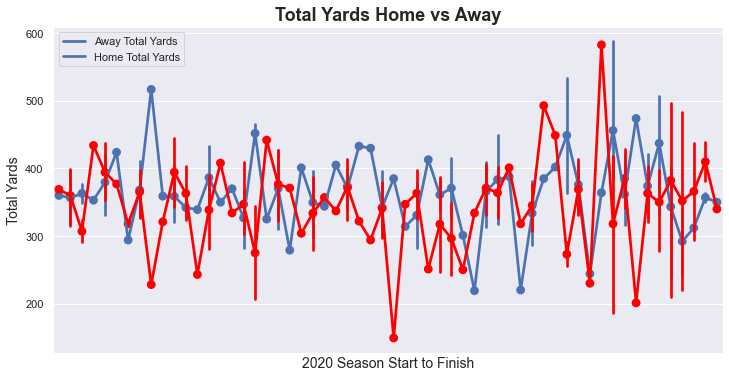

In [20]:
sns.pointplot(s2020['date'], s2020['total_yds_A'])
sns.pointplot(s2020['date'], s2020['total_yds_H'], color='red')

plt.xticks([])
plt.title('Total Yards Home vs Away', fontsize=18, fontweight='bold')
plt.xlabel('2020 Season Start to Finish', fontsize=14)
plt.ylabel('Total Yards', fontsize=14)
plt.legend(['Away Total Yards', 'Home Total Yards'])

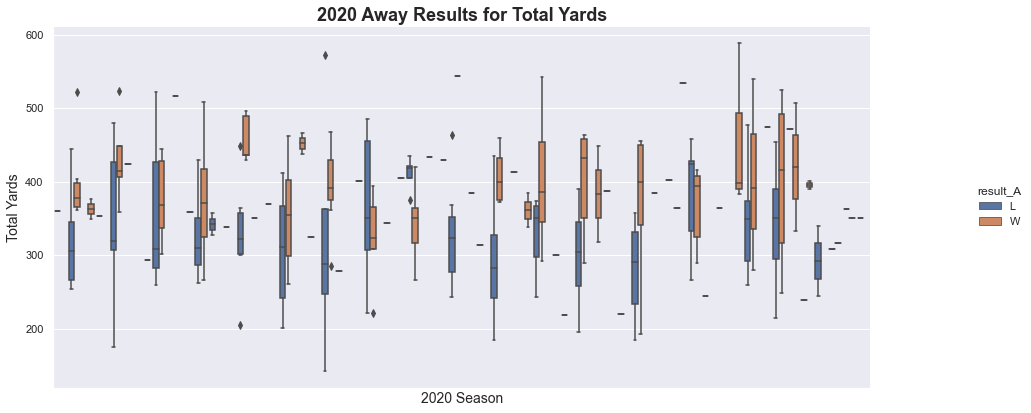

In [21]:
ax = sns.catplot(x='date', y='total_yds_A', hue='result_A', kind='box', data=s2020)
ax.fig.set_figheight(6)
ax.fig.set_figwidth(16)
plt.xticks([])
plt.title('2020 Away Results for Total Yards', fontsize=18, fontweight='bold')
plt.xlabel('2020 Season', fontsize=14)
plt.ylabel('Total Yards', fontsize=14);

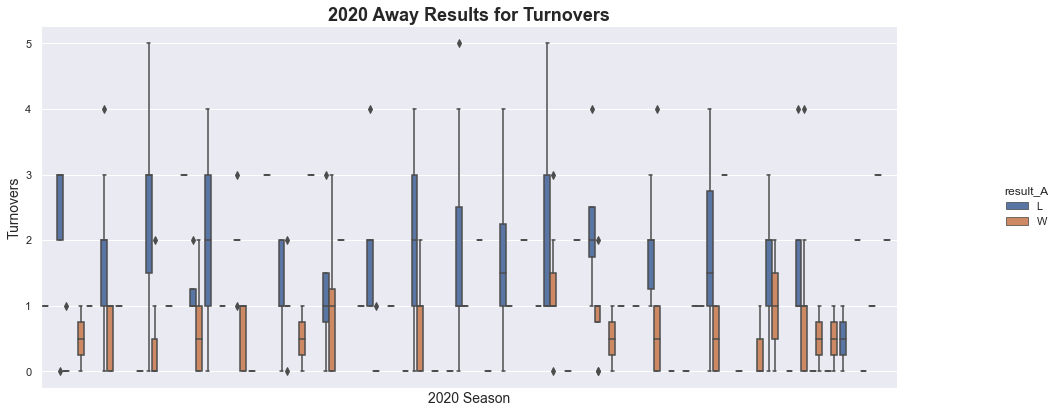

In [22]:
ax = sns.catplot(x='date', y='to_A', hue='result_A', kind='box', data=s2020)
ax.fig.set_figheight(6)
ax.fig.set_figwidth(16)
plt.xticks([])
plt.title('2020 Away Results for Turnovers', fontsize=18, fontweight='bold')
plt.xlabel('2020 Season', fontsize=14)
plt.ylabel('Turnovers', fontsize=14);

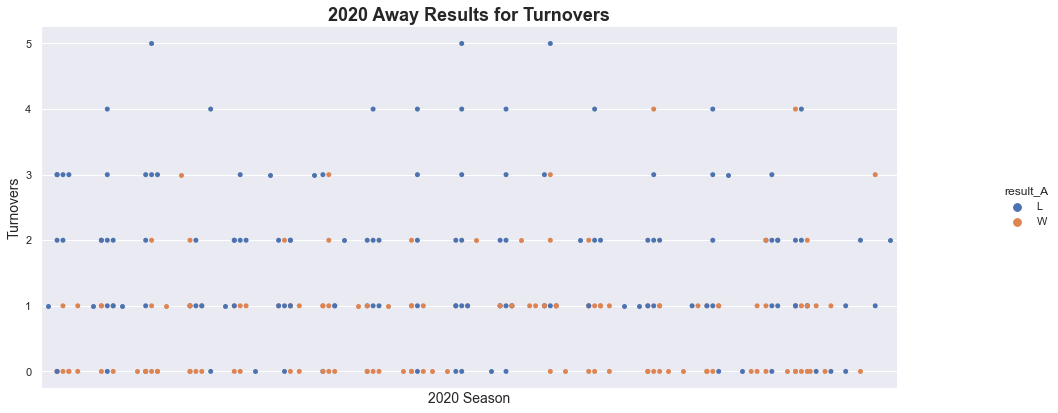

In [23]:
ax = sns.catplot(x='date', y='to_A', hue='result_A', kind='swarm', data=s2020)
ax.fig.set_figheight(6)
ax.fig.set_figwidth(16)
plt.xticks([])
plt.title('2020 Away Results for Turnovers', fontsize=18, fontweight='bold')
plt.xlabel('2020 Season', fontsize=14)
plt.ylabel('Turnovers', fontsize=14);

Let's get the Bengals W/L and Win % for the 2020 season

In [24]:
s2020_Bengals_AL = s2020[(s2020['result_A'] =='L') & (s2020['A'] == 'Bengals')]
s2020_Bengals_AW = s2020[(s2020['result_A'] =='W') & (s2020['A'] == 'Bengals')]
s2020_Bengals_HL = s2020[(s2020['result_H'] =='L') & (s2020['H'] == 'Bengals')]
s2020_Bengals_HW = s2020[(s2020['result_H'] =='W') & (s2020['H'] == 'Bengals')]
s2020_Bengals = pd.DataFrame([s2020_Bengals_AL, s2020_Bengals_AW, s2020_Bengals_HL, s2020_Bengals_HW])
s2020_Bengals = pd.concat([s2020_Bengals_AL, s2020_Bengals_AW, s2020_Bengals_HL, s2020_Bengals_HW])

s2020_Bengals_A = pd.concat([s2020_Bengals_AL, s2020_Bengals_AW])
s2020_Bengals_H = pd.concat([s2020_Bengals_HL, s2020_Bengals_HW])

s2020_Bengals

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H
4819,20200917,Bengals,Browns,L,W,30,35,1,1,353,434,4-45,8-76
4842,20200927,Bengals,Eagles,L,L,23,23,0,2,304,378,9-73,11-93
4872,20201011,Bengals,Ravens,L,W,3,27,3,1,205,332,5-40,4-25
4881,20201018,Bengals,Colts,L,W,27,31,1,2,398,430,6-20,6-55
4947,20201115,Bengals,Steelers,L,W,10,36,2,0,324,377,6-65,6-45
4953,20201122,Bengals,Washington,L,W,9,20,2,1,272,325,3-31,6-49
4983,20201206,Bengals,Dolphins,L,W,7,19,2,1,196,406,6-62,8-54
5036,20201227,Bengals,Texans,W,L,37,31,0,1,540,488,5-35,6-46
4813,20200913,Chargers,Bengals,W,L,16,13,0,2,362,295,6-35,7-44
4896,20201025,Browns,Bengals,W,L,37,34,1,2,398,468,5-40,7-45


In [25]:
s2020_Bengals_AWtotal = [(s2020_Bengals_A['result_A'] == 'W').sum()]
s2020_Bengals_HWtotal = [(s2020_Bengals_H['result_H'] == 'W').sum()]
s2020_Bengals_AWtotal = pd.to_numeric(s2020_Bengals_AWtotal)
s2020_Bengals_HWtotal = pd.to_numeric(s2020_Bengals_HWtotal)
s2020_Bengals_Wins = s2020_Bengals_AWtotal + s2020_Bengals_HWtotal

s2020_Bengals_ALtotal = [(s2020_Bengals_A['result_A'] == 'L').sum()]
s2020_Bengals_HLtotal = [(s2020_Bengals_H['result_H'] == 'L').sum()]
s2020_Bengals_ALtotal = pd.to_numeric(s2020_Bengals_ALtotal)
s2020_Bengals_HLtotal = pd.to_numeric(s2020_Bengals_HLtotal)
s2020_Bengals_Loss = s2020_Bengals_ALtotal + s2020_Bengals_HLtotal

print('The Bengals Record in 2020 was: ', s2020_Bengals_Wins, '-', s2020_Bengals_Loss)

print('The Bengals Win % in 2020 was: ', s2020_Bengals_Wins / s2020_Bengals_Loss)

The Bengals Record in 2020 was:  [4] - [12]
The Bengals Win % in 2020 was:  [0.33333333]


In [26]:
s2020_Bengals_A_adj = s2020_Bengals_A[['date', 'A', 'result_A', 'to_A', 'total_yds_A', 'pen_A']]
s2020_Bengals_A_adj

,date,A,result_A,to_A,total_yds_A,pen_A
4819,20200917,Bengals,L,1,353,4-45
4842,20200927,Bengals,L,0,304,9-73
4872,20201011,Bengals,L,3,205,5-40
4881,20201018,Bengals,L,1,398,6-20
4947,20201115,Bengals,L,2,324,6-65
4953,20201122,Bengals,L,2,272,3-31
4983,20201206,Bengals,L,2,196,6-62
5036,20201227,Bengals,W,0,540,5-35


I am going to create a dataset for every winner's stats in each game for 2020 and another dataset for every loser's stats in each game in 2020

In [27]:
s2020_A_Loser_Stats = s2020[s2020['result_A'] == 'L']
s2020_H_Loser_Stats = s2020[s2020['result_H'] == 'L']

s2020_A_Loser_Stats = s2020_A_Loser_Stats[['date', 'A', 'result_A', 'to_A', 'total_yds_A', 'pen_A']]
s2020_H_Loser_Stats = s2020_H_Loser_Stats[['date', 'H', 'result_H', 'to_H', 'total_yds_H', 'pen_H']]

s2020_A_Loser_Stats.rename(columns = {'date': 'Date', 
                                      'A':'Team', 
                                      'result_A':'Result', 
                                      'to_A':'TO', 
                                      'total_yds_A':'Total_Yards', 
                                      'pen_A': 'pen'}, 
                           inplace = True)
                                      
s2020_H_Loser_Stats.rename(columns = {'date': 'Date', 
                                      'H':'Team', 
                                      'result_H':'Result', 
                                      'to_H':'TO', 
                                      'total_yds_H':'Total_Yards', 
                                      'pen_H': 'pen'}, 
                           inplace = True)

s2020_Loser_Stats  = pd.concat([s2020_A_Loser_Stats, s2020_H_Loser_Stats])

In [28]:
print('2020 Home Loser Stats')
print(s2020_H_Loser_Stats.describe())
print('-'*45)
print('2020 Away Loser Stats')
print(s2020_A_Loser_Stats.describe())
print('-'*45)
print('2020 Loser Stats')
print(s2020_Loser_Stats.describe())

2020 Home Loser Stats
               Date          TO  Total_Yards
count  1.350000e+02  135.000000   135.000000
mean   2.020208e+07    1.755556   335.340741
std    2.848900e+03    1.187413    87.798290
min    2.020091e+07    0.000000   108.000000
25%    2.020101e+07    1.000000   280.000000
50%    2.020111e+07    2.000000   344.000000
75%    2.020121e+07    2.000000   393.000000
max    2.021012e+07    5.000000   566.000000
---------------------------------------------
2020 Away Loser Stats
               Date          TO  Total_Yards
count  1.350000e+02  135.000000   135.000000
mean   2.020201e+07    1.740741   333.518519
std    2.768452e+03    1.196780    80.314387
min    2.020091e+07    0.000000   142.000000
25%    2.020101e+07    1.000000   272.500000
50%    2.020112e+07    2.000000   330.000000
75%    2.020121e+07    2.000000   380.000000
max    2.021021e+07    5.000000   572.000000
---------------------------------------------
2020 Loser Stats
               Date          TO  Tota

In [29]:
s2020_Loser_Stats.head()

,Date,Team,Result,TO,Total_Yards,pen
4803,20200910,Texans,L,1,360,5-37
4805,20200913,Jets,L,2,254,9-95
4808,20200913,Dolphins,L,3,269,4-35
4809,20200913,Eagles,L,3,265,3-20
4811,20200913,Colts,L,2,445,5-80


### Decision Tree

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
s2020_Bengals.columns

Index(['date', 'A', 'H', 'result_A', 'result_H', 'score_A', 'score_H', 'to_A',
       'to_H', 'total_yds_A', 'total_yds_H', 'pen_A', 'pen_H'],
      dtype='object')

In [32]:
s2020_Bengals_OneHot = s2020_Bengals.copy()
s2020_Bengals_OneHot.head(2)

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H
4819,20200917,Bengals,Browns,L,W,30,35,1,1,353,434,4-45,8-76
4842,20200927,Bengals,Eagles,L,L,23,23,0,2,304,378,9-73,11-93


In [33]:
def change(col):
    if col=='W':
        return 1
    elif col=='L':
        return 0

s2020_Bengals_OneHot['result_A'] = s2020_Bengals_OneHot['result_A'].apply(change)
s2020_Bengals_OneHot['result_H'] = s2020_Bengals_OneHot['result_H'].apply(change)

s2020_Bengals_OneHot['A'].unique()

array(['Bengals', 'Chargers', 'Browns', 'Giants', 'Cowboys', 'Ravens',
       'Jaguars', 'Titans', 'Steelers'], dtype=object)

In [34]:
s2020_Bengals_OneHot['H'].unique()

array(['Browns', 'Eagles', 'Ravens', 'Colts', 'Steelers', 'Washington',
       'Dolphins', 'Texans', 'Bengals'], dtype=object)

In [35]:
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Bengals'),'A'] = '1'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Bengals'),'H'] = '1'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Chargers'),'A'] = '2'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Chargers'),'H'] = '2'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Browns'),'A'] = '3'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Browns'),'H'] = '3'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Giants'),'A'] = '4'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Giants'),'H'] = '4'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Cowboys'),'A'] = '5'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Cowboys'),'H'] = '5'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Ravens'),'A'] = '6'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Ravens'),'H'] = '6'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Jaguars'),'A'] = '7'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Jaguars'),'H'] = '7'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Titans'),'A'] = '8'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Titans'),'H'] = '8'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Steelers'),'A'] = '9'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Steelers'),'H'] = '9'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Eagles'),'A'] = '10'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Eagles'),'H'] = '10'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Colts'),'A'] = '11'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Colts'),'H'] = '11'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Washington'),'A'] = '12'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Washington'),'H'] = '12'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Dolohins'),'A'] = '13'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Dolphins'),'H'] = '13'

s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['A'].str.contains('Texans'),'A'] = '14'
s2020_Bengals_OneHot.loc[s2020_Bengals_OneHot['H'].str.contains('Texans'),'H'] = '14'

s2020_Bengals_OneHot.head(2)

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H
4819,20200917,1,3,0,1,30,35,1,1,353,434,4-45,8-76
4842,20200927,1,10,0,0,23,23,0,2,304,378,9-73,11-93


In [36]:
s2020_Bengals_OneHot[['pen_num_A', 'pen_yds_A']] = s2020_Bengals_OneHot['pen_A'].str.split('-', expand=True)

s2020_Bengals_OneHot

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H,pen_num_A,pen_yds_A
4819,20200917,1,3,0,1,30,35,1,1,353,434,4-45,8-76,4,45
4842,20200927,1,10,0,0,23,23,0,2,304,378,9-73,11-93,9,73
4872,20201011,1,6,0,1,3,27,3,1,205,332,5-40,4-25,5,40
4881,20201018,1,11,0,1,27,31,1,2,398,430,6-20,6-55,6,20
4947,20201115,1,9,0,1,10,36,2,0,324,377,6-65,6-45,6,65
4953,20201122,1,12,0,1,9,20,2,1,272,325,3-31,6-49,3,31
4983,20201206,1,13,0,1,7,19,2,1,196,406,6-62,8-54,6,62
5036,20201227,1,14,1,0,37,31,0,1,540,488,5-35,6-46,5,35
4813,20200913,2,1,1,0,16,13,0,2,362,295,6-35,7-44,6,35
4896,20201025,3,1,1,0,37,34,1,2,398,468,5-40,7-45,5,40


In [37]:
col_2020 = ['A', 'H', 'result_A', 'result_H', 'score_A', 'score_H', 'to_A']
X_dt = s2020_Bengals_OneHot[col_2020]
y_dt = s2020_Bengals_OneHot['result_A']

X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.2)

In [38]:
sc = StandardScaler()
X_dt_train = sc.fit_transform(X_dt_train)
X_dt_test = sc.transform(X_dt_test)

In [39]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_dt_train, y_dt_train)
y_pred = decision_tree.predict(X_dt_test)
cm = confusion_matrix(y_dt_test,y_pred)
print(cm)
print('Decision Tree Accuracy Score: ', accuracy_score(y_dt_test,y_pred))

[[3 1]
 [0 0]]
Decision Tree Accuracy Score:  0.75


In [40]:
!pip install pydotplus 
import pydotplus
from IPython.display import Image
!pip install graphviz
import graphviz

In [41]:
# Initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3
)
decision_tree.fit(X_dt, y_dt)

# Render the tree
features = s2020_Bengals_OneHot.columns
features = features[0:7]

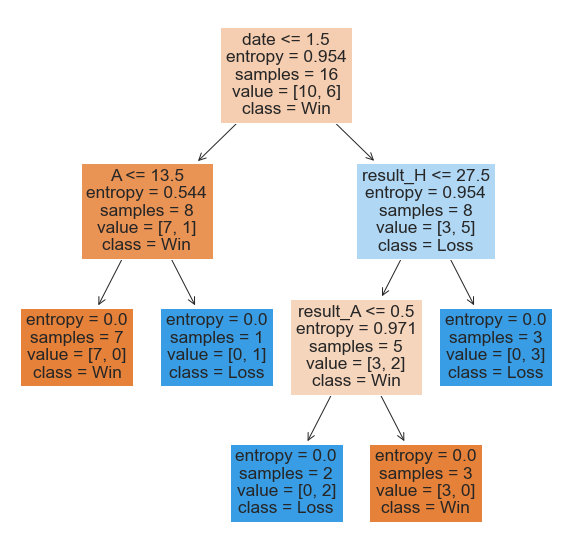

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(decision_tree, feature_names = features, class_names = ['Win', 'Loss'], filled=True);

### Visualizing the Past 5 Seasons

In [43]:
# I am going to focus on the last 5 seasons for most of my analysis

past_5 = df.loc[(df['date'] > 20170300)]

past_5

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H
4002,20170907,Chiefs,Patriots,W,L,42,27,1,0,537,371,15-139,6-55
4003,20170910,Jets,Bills,L,W,12,21,2,1,214,408,5-62,6-50
4004,20170910,Falcons,Bears,W,L,23,17,0,0,372,301,8-73,4-40
4005,20170910,Ravens,Bengals,W,L,20,0,1,5,268,221,11-85,9-66
4006,20170910,Steelers,Browns,W,L,21,18,1,1,290,237,13-143,4-61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,20220123,Rams,Buccaneers,W,L,30,27,4,2,428,359,4-45,4-61
5353,20220123,Bills,Chiefs,L,W,36,42,0,0,422,552,3-15,1-10
5354,20220130,Bengals,Chiefs,W,L,27,24,1,2,359,375,4-30,2-11
5355,20220130,49ers,Rams,L,W,17,20,1,1,282,396,6-54,2-10


In [44]:
past_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1355 entries, 4002 to 5356
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1355 non-null   int32 
 1   A            1355 non-null   object
 2   H            1355 non-null   object
 3   result_A     1355 non-null   object
 4   result_H     1355 non-null   object
 5   score_A      1355 non-null   int32 
 6   score_H      1355 non-null   int32 
 7   to_A         1355 non-null   int64 
 8   to_H         1355 non-null   int64 
 9   total_yds_A  1355 non-null   int64 
 10  total_yds_H  1355 non-null   int64 
 11  pen_A        1355 non-null   object
 12  pen_H        1355 non-null   object
dtypes: int32(3), int64(4), object(6)
memory usage: 132.3+ KB


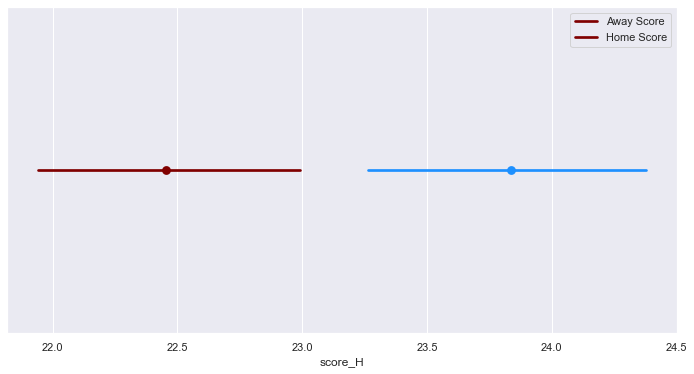

In [45]:
sns.pointplot(past_5['score_A'], color='maroon')
sns.pointplot(past_5['score_H'], color='dodgerblue')
plt.legend(['Away Score', 'Home Score']);

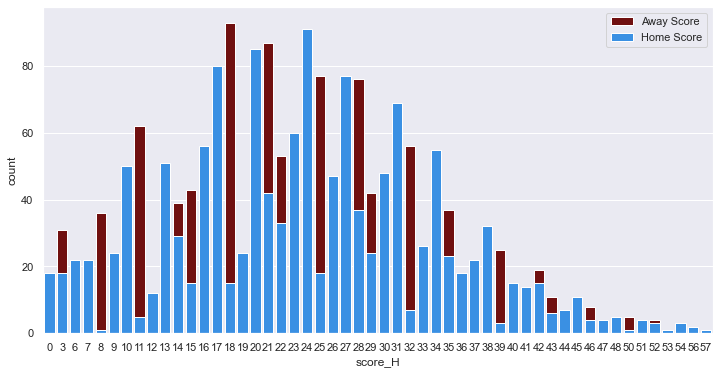

In [46]:
sns.countplot(past_5['score_A'], color='maroon')
sns.countplot(past_5['score_H'], color='dodgerblue')
plt.legend(['Away Score', 'Home Score']);

In [47]:
past_5['score_diff'] = past_5['score_A'] - past_5['score_H']
past_5['score_diff']

4002    15
4003    -9
4004     6
4005    20
4006     3
        ..
5352     3
5353    -6
5354     3
5355    -3
5356     3
Name: score_diff, Length: 1355, dtype: int32

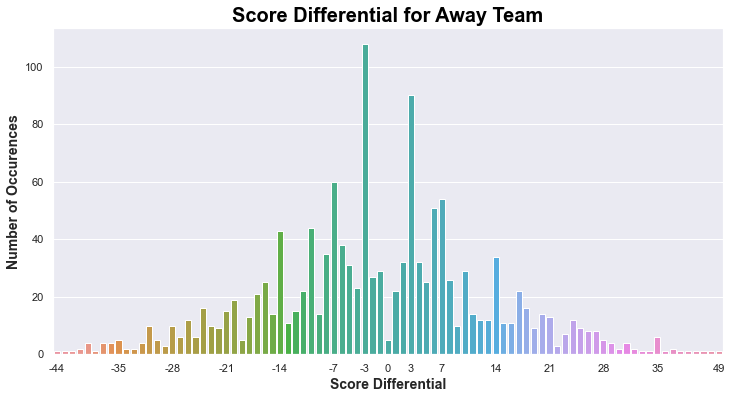

In [48]:
sns.countplot(past_5['score_diff'])
plt.xlabel('Score Differential', fontsize=14, fontweight='bold')
plt.ylabel('Number of Occurences', fontsize=14, fontweight='bold')
plt.title('Score Differential for Away Team', fontsize=20, fontweight='bold', color='black')
plt.xticks([0,8,15,22,29,36,40,43,46,50,57,64,71,78,86]);

In [49]:
past_5['score_diff'].value_counts().head(20)

-3     108
 3      90
-7      60
 7      54
 6      51
-10     44
-14     43
-6      38
-8      35
 14     34
 4      32
 2      32
-5      31
-1      29
 10     29
-2      27
 8      26
-16     25
 5      25
-4      23
Name: score_diff, dtype: int64

In [50]:
past_5_1poss = past_5.loc[(past_5['score_diff'] <= 8) & (past_5['score_diff'] >=-8)]

print('1 possession games decided by 8 points or less')
print('-'*50)

total_1poss_games = past_5_1poss.value_counts().sum()
print('1 possession games over last 5 years: ', total_1poss_games)

total_games = past_5.value_counts().sum()
print('Total games over last 5 years:        ', total_games)

pct_1poss = total_1poss_games / total_games *100
print('Percentage 1 possession games:        ', round(pct_1poss,1))

1 possession games decided by 8 points or less
--------------------------------------------------
1 possession games over last 5 years:  688
Total games over last 5 years:         1355
Percentage 1 possession games:         50.8


In [51]:
past_5_1poss = past_5.loc[(past_5['score_diff'] <= 7) & (past_5['score_diff'] >=-7)]

print('1 possession games decided by 7 points or less')
print('-'*50)

total_1poss_games = past_5_1poss.value_counts().sum()
print('1 possession games over last 5 years: ', total_1poss_games)

total_games = past_5.value_counts().sum()
print('Total games over last 5 years:        ', total_games)

pct_1poss = total_1poss_games / total_games *100
print('Percentage 1 possession games:        ', round(pct_1poss,1))

1 possession games decided by 7 points or less
--------------------------------------------------
1 possession games over last 5 years:  627
Total games over last 5 years:         1355
Percentage 1 possession games:         46.3


In [52]:
past_5_Bengals_A = past_5.loc[(past_5['A'] == 'Bengals')]
past_5_Bengals_A = pd.DataFrame(past_5_Bengals_A)
past_5_Bengals_A.head()

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H,score_diff
4045,20170924,Bengals,Packers,L,W,24,27,1,1,301,344,7-68,4-33,-3
4052,20171001,Bengals,Browns,W,L,31,7,1,1,350,215,8-66,4-28,24
4104,20171022,Bengals,Steelers,L,W,14,29,2,0,179,420,5-54,1-5,-15
4127,20171105,Bengals,Jaguars,L,W,7,23,0,1,148,408,8-77,5-50,-16
4138,20171112,Bengals,Titans,L,W,20,24,2,2,308,416,12-84,5-55,-4


In [53]:
past_5_Bengals_H = past_5.loc[(past_5['H'] == 'Bengals')]
past_5_Bengals_H = pd.DataFrame(past_5_Bengals_H)
past_5_Bengals_H.head()

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H,score_diff
4005,20170910,Ravens,Bengals,W,L,20,0,1,5,268,221,11-85,9-66,20
4017,20170914,Texans,Bengals,W,L,13,9,0,1,266,295,9-61,7-45,4
4066,20171008,Bills,Bengals,L,W,16,20,1,3,221,388,6-71,6-71,-4
4111,20171029,Colts,Bengals,L,W,23,24,1,2,331,276,7-45,5-54,-1
4166,20171126,Browns,Bengals,L,W,16,30,0,0,405,361,7-69,4-35,-14


In [54]:
past_5_Bengals = pd.concat([past_5_Bengals_A, past_5_Bengals_H])
past_5_Bengals

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H,score_diff
4045,20170924,Bengals,Packers,L,W,24,27,1,1,301,344,7-68,4-33,-3
4052,20171001,Bengals,Browns,W,L,31,7,1,1,350,215,8-66,4-28,24
4104,20171022,Bengals,Steelers,L,W,14,29,2,0,179,420,5-54,1-5,-15
4127,20171105,Bengals,Jaguars,L,W,7,23,0,1,148,408,8-77,5-50,-16
4138,20171112,Bengals,Titans,L,W,20,24,2,2,308,416,12-84,5-55,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,20211212,49ers,Bengals,W,L,26,23,0,2,355,397,6-40,2-19,3
5300,20211226,Ravens,Bengals,L,W,21,41,1,0,334,575,6-27,5-45,-20
5314,20220102,Chiefs,Bengals,L,W,31,34,0,0,414,475,10-83,5-62,-3
5344,20220115,Raiders,Bengals,L,W,19,26,2,0,385,308,7-46,7-56,-7


In [55]:
past_5_Bengals = past_5_Bengals.sort_values(['date'])
past_5_Bengals

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H,score_diff
4005,20170910,Ravens,Bengals,W,L,20,0,1,5,268,221,11-85,9-66,20
4017,20170914,Texans,Bengals,W,L,13,9,0,1,266,295,9-61,7-45,4
4045,20170924,Bengals,Packers,L,W,24,27,1,1,301,344,7-68,4-33,-3
4052,20171001,Bengals,Browns,W,L,31,7,1,1,350,215,8-66,4-28,24
4066,20171008,Bills,Bengals,L,W,16,20,1,3,221,388,6-71,6-71,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,20220109,Bengals,Browns,L,W,16,21,0,2,182,376,4-32,4-46,-5
5344,20220115,Raiders,Bengals,L,W,19,26,2,0,385,308,7-46,7-56,-7
5350,20220122,Bengals,Titans,W,L,19,16,1,3,345,353,6-46,2-15,3
5354,20220130,Bengals,Chiefs,W,L,27,24,1,2,359,375,4-30,2-11,3


Now that I have the Bengals last 5 seasons sorted by date, I am going to do this with all of the other teams.

In [56]:
past_5['A'].unique()

array(['Chiefs', 'Jets', 'Falcons', 'Ravens', 'Steelers', 'Cardinals',
       'Raiders', 'Eagles', 'Jaguars', 'Colts', 'Seahawks', 'Panthers',
       'Giants', 'Saints', 'Chargers', 'Texans', 'Patriots', 'Vikings',
       'Bears', 'Bills', 'Titans', 'Browns', 'Dolphins', 'Cowboys',
       'Washington', '49ers', 'Packers', 'Lions', 'Rams', 'Broncos',
       'Buccaneers', 'Bengals'], dtype=object)

In [57]:
past_5_Chiefs_A = past_5.loc[(past_5['A'] == 'Chiefs')]
past_5_Chiefs_A = pd.DataFrame(past_5_Chiefs_A)

past_5_Chiefs_H = past_5.loc[(past_5['H'] == 'Chiefs')]
past_5_Chiefs_H = pd.DataFrame(past_5_Chiefs_H)

past_5_Chiefs = pd.concat([past_5_Chiefs_A, past_5_Chiefs_H])
past_5_Chiefs = past_5_Chiefs.sort_values(['date'])

past_5_Chiefs

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H,score_diff
4002,20170907,Chiefs,Patriots,W,L,42,27,1,0,537,371,15-139,6-55,15
4019,20170917,Eagles,Chiefs,L,W,20,27,2,0,406,344,4-30,5-40,-7
4046,20170924,Chiefs,Chargers,W,L,24,10,0,3,311,330,13-122,8-61,14
4064,20171002,Washington,Chiefs,L,W,20,29,1,0,331,429,7-44,3-15,-9
4077,20171008,Chiefs,Texans,W,L,42,34,0,1,450,392,6-64,7-59,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,20220102,Chiefs,Bengals,L,W,31,34,0,0,414,475,10-83,5-62,-3
5328,20220108,Chiefs,Broncos,W,L,28,24,0,1,390,364,5-45,6-45,4
5348,20220116,Steelers,Chiefs,L,W,21,42,1,2,257,478,4-45,3-25,-21
5353,20220123,Bills,Chiefs,L,W,36,42,0,0,422,552,3-15,1-10,-6


In [58]:
nfl_teams = ['Chiefs', 'Jets', 'Falcons', 'Ravens', 'Steelers', 'Cardinals',
       'Raiders', 'Eagles', 'Jaguars', 'Colts', 'Seahawks', 'Panthers',
       'Giants', 'Saints', 'Chargers', 'Texans', 'Patriots', 'Vikings',
       'Bears', 'Bills', 'Titans', 'Browns', 'Dolphins', 'Cowboys',
       'Washington', '49ers', 'Packers', 'Lions', 'Rams', 'Broncos',
       'Buccaneers', 'Bengals']


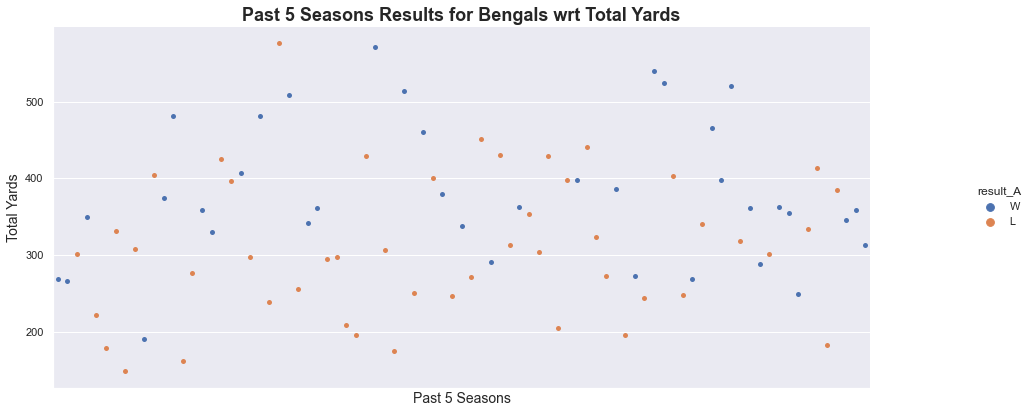

In [59]:
ax = sns.catplot(x='date', y='total_yds_A', hue='result_A', kind='swarm', data=past_5_Bengals)
ax.fig.set_figheight(6)
ax.fig.set_figwidth(16)
plt.xticks([])
plt.title('Past 5 Seasons Results for Bengals wrt Total Yards', fontsize=18, fontweight='bold')
plt.xlabel('Past 5 Seasons', fontsize=14)
plt.ylabel('Total Yards', fontsize=14);

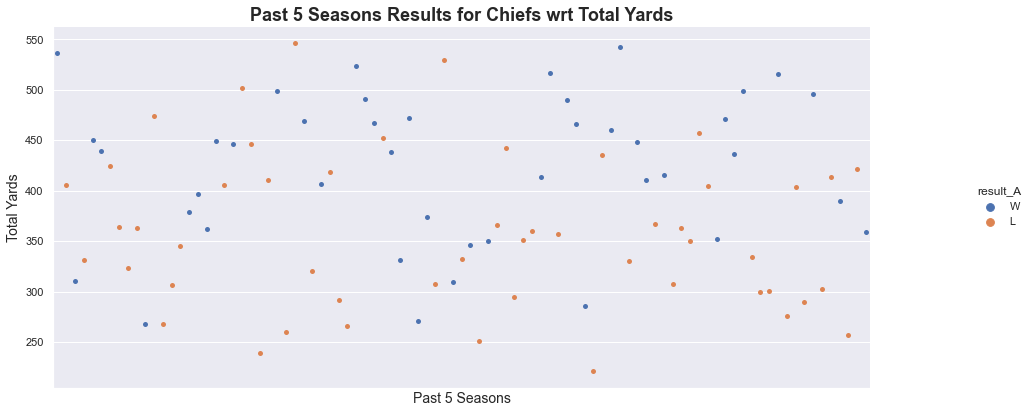

In [60]:
ax = sns.catplot(x='date', y='total_yds_A', hue='result_A', kind='swarm', data=past_5_Chiefs)
ax.fig.set_figheight(6)
ax.fig.set_figwidth(16)
plt.xticks([])
plt.title('Past 5 Seasons Results for Chiefs wrt Total Yards', fontsize=18, fontweight='bold')
plt.xlabel('Past 5 Seasons', fontsize=14)
plt.ylabel('Total Yards', fontsize=14);

### Now let's look at some Decision Trees for the last 5 seasons

First we need to give all stings numerical values

In [61]:
past_5_OneHot = past_5.copy()
past_5_OneHot.head(2)

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H,score_diff
4002,20170907,Chiefs,Patriots,W,L,42,27,1,0,537,371,15-139,6-55,15
4003,20170910,Jets,Bills,L,W,12,21,2,1,214,408,5-62,6-50,-9


In [62]:
def change(col):
    if col=='W':
        return 1
    elif col=='L':
        return 0

past_5_OneHot['result_A'] = past_5_OneHot['result_A'].apply(change)
past_5_OneHot['result_H'] = past_5_OneHot['result_H'].apply(change)

past_5_OneHot['A'].unique()

array(['Chiefs', 'Jets', 'Falcons', 'Ravens', 'Steelers', 'Cardinals',
       'Raiders', 'Eagles', 'Jaguars', 'Colts', 'Seahawks', 'Panthers',
       'Giants', 'Saints', 'Chargers', 'Texans', 'Patriots', 'Vikings',
       'Bears', 'Bills', 'Titans', 'Browns', 'Dolphins', 'Cowboys',
       'Washington', '49ers', 'Packers', 'Lions', 'Rams', 'Broncos',
       'Buccaneers', 'Bengals'], dtype=object)

In [63]:
past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Chiefs'),'A'] = '1'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Chiefs'),'H'] = '1'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Jets'),'A'] = '2'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Jets'),'H'] = '2'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Falcons'),'A'] = '3'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Falcons'),'H'] = '3'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Ravens'),'A'] = '4'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Ravens'),'H'] = '4'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Steelers'),'A'] = '5'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Steelers'),'H'] = '5'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Cardinals'),'A'] = '6'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Cardinals'),'H'] = '6'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Raiders'),'A'] = '7'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Raiders'),'H'] = '7'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Eagles'),'A'] = '8'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Eagles'),'H'] = '8'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Jaguars'),'A'] = '9'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Jaguars'),'H'] = '9'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Colts'),'A'] = '10'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Colts'),'H'] = '10'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Seahawks'),'A'] = '11'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Seahawks'),'H'] = '11'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Panthers'),'A'] = '12'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Panthers'),'H'] = '12'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Giants'),'A'] = '13'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Giants'),'H'] = '13'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Saints'),'A'] = '14'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Saints'),'H'] = '14'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Chargers'),'A'] = '15'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Chargers'),'H'] = '15'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Texans'),'A'] = '16'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Texans'),'H'] = '16'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Patriots'),'A'] = '17'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Patriots'),'H'] = '17'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Vikings'),'A'] = '18'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Vikings'),'H'] = '18'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Bears'),'A'] = '19'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Bears'),'H'] = '19'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Bills'),'A'] = '20'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Bills'),'H'] = '20'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Titans'),'A'] = '21'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Titans'),'H'] = '21'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Browns'),'A'] = '22'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Browns'),'H'] = '22'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Dolphins'),'A'] = '23'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Dolphins'),'H'] = '23'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Cowboys'),'A'] = '24'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Cowboys'),'H'] = '24'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Washington'),'A'] = '25'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Washington'),'H'] = '25'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('49ers'),'A'] = '26'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('49ers'),'H'] = '26'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Packers'),'A'] = '27'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Packers'),'H'] = '27'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Lions'),'A'] = '28'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Lions'),'H'] = '28'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Rams'),'A'] = '29'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Rams'),'H'] = '29'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Broncos'),'A'] = '30'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Broncos'),'H'] = '30'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Buccaneers'),'A'] = '31'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Buccaneers'),'H'] = '31'

past_5_OneHot.loc[past_5_OneHot['A'].str.contains('Bengals'),'A'] = '32'
past_5_OneHot.loc[past_5_OneHot['H'].str.contains('Bengals'),'H'] = '32'

past_5_OneHot.head(2)

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H,score_diff
4002,20170907,1,17,1,0,42,27,1,0,537,371,15-139,6-55,15
4003,20170910,2,20,0,1,12,21,2,1,214,408,5-62,6-50,-9


In [64]:
past_5_OneHot[['pen_num_A', 'pen_yds_A']] = past_5_OneHot['pen_A'].str.split('-', expand=True)
past_5_OneHot[['pen_num_H', 'pen_yds_H']] = past_5_OneHot['pen_H'].str.split('-', expand=True)

past_5_OneHot.head()

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,pen_A,pen_H,score_diff,pen_num_A,pen_yds_A,pen_num_H,pen_yds_H
4002,20170907,1,17,1,0,42,27,1,0,537,371,15-139,6-55,15,15,139,6,55
4003,20170910,2,20,0,1,12,21,2,1,214,408,5-62,6-50,-9,5,62,6,50
4004,20170910,3,19,1,0,23,17,0,0,372,301,8-73,4-40,6,8,73,4,40
4005,20170910,4,32,1,0,20,0,1,5,268,221,11-85,9-66,20,11,85,9,66
4006,20170910,5,22,1,0,21,18,1,1,290,237,13-143,4-61,3,13,143,4,61


In [65]:
past_5_OneHot = past_5_OneHot.drop('pen_A', axis=1)
past_5_OneHot = past_5_OneHot.drop('pen_H', axis=1)

past_5_OneHot.head(2)

,date,A,H,result_A,result_H,score_A,score_H,to_A,to_H,total_yds_A,total_yds_H,score_diff,pen_num_A,pen_yds_A,pen_num_H,pen_yds_H
4002,20170907,1,17,1,0,42,27,1,0,537,371,15,15,139,6,55
4003,20170910,2,20,0,1,12,21,2,1,214,408,-9,5,62,6,50


Now that we have all str values converted to integers let perform the decision tree

In [66]:
col_past_5_A = ['A', 'score_A', 'to_A', 'total_yds_A', 'pen_num_A', 'pen_yds_A']
X_dt_A = past_5_OneHot[col_2020]
y_dt_A = past_5_OneHot['result_A']

X_dt_A_train, X_dt_A_test, y_dt_A_train, y_dt_A_test = train_test_split(X_dt_A, y_dt_A, test_size=0.2)

In [67]:
sc = StandardScaler()
X_dt_A_train = sc.fit_transform(X_dt_A_train)
X_dt_A_test = sc.transform(X_dt_A_test)

In [68]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_dt_A_train, y_dt_A_train)
y_A_pred = decision_tree.predict(X_dt_A_test)
cm_A = confusion_matrix(y_dt_A_test,y_A_pred)
print(cm_A)
print('Decision Tree Accuracy Score: ', accuracy_score(y_dt_A_test,y_A_pred))

[[151   0]
 [  0 120]]
Decision Tree Accuracy Score:  1.0


In [69]:
# Initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3
)
decision_tree.fit(X_dt_A, y_dt_A)

# Render the tree
features = past_5_OneHot.columns
features = features[0:7]

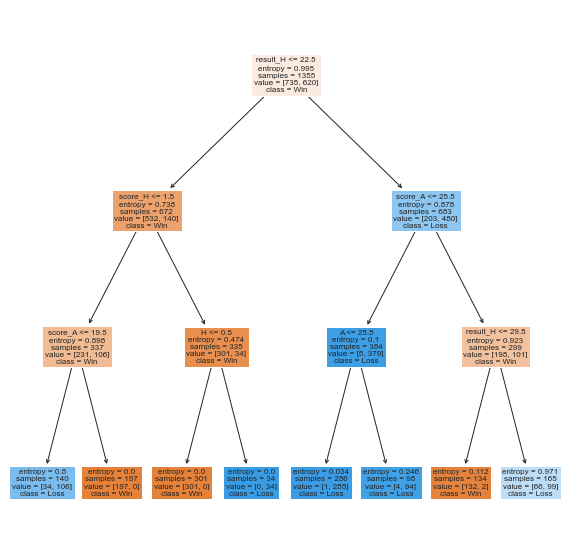

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(decision_tree, feature_names = features, class_names = ['Win', 'Loss'], filled=True);

In [71]:
col_past_5_H = ['H', 'score_H', 'to_H', 'total_yds_H', 'pen_num_H', 'pen_yds_H']
X_dt_H = past_5_OneHot[col_2020]
y_dt_H = past_5_OneHot['result_H']

X_dt_H_train, X_dt_H_test, y_dt_H_train, y_dt_H_test = train_test_split(X_dt_H, y_dt_H, test_size=0.2)

In [72]:
sc = StandardScaler()
X_dt_H_train = sc.fit_transform(X_dt_H_train)
X_dt_H_test = sc.transform(X_dt_H_test)

In [73]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_dt_H_train, y_dt_H_train)
y_H_pred = decision_tree.predict(X_dt_H_test)
cm_H = confusion_matrix(y_dt_H_test,y_H_pred)
print(cm_H)
print('Decision Tree Accuracy Score: ', accuracy_score(y_dt_H_test,y_H_pred))

[[127   0]
 [  0 144]]
Decision Tree Accuracy Score:  1.0


In [74]:
# Initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3
)
decision_tree.fit(X_dt_H, y_dt_H)

# Render the tree
features = past_5_OneHot.columns
features = features[0:7]

Accuracy:  1.0


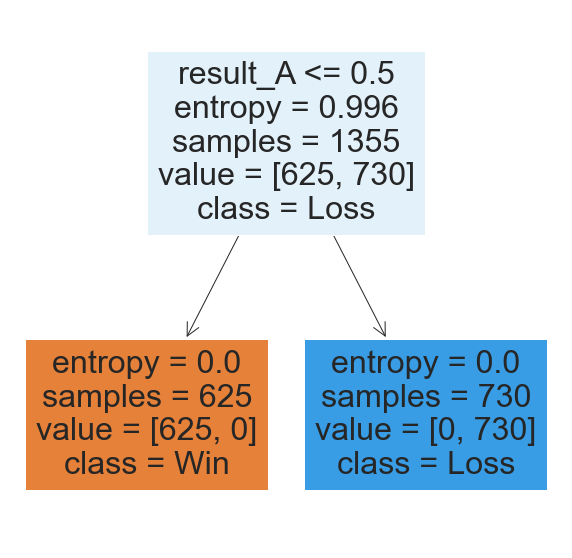

In [75]:
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(decision_tree, feature_names = features, class_names = ['Win', 'Loss'], filled=True);

print('Accuracy: ', round(decision_tree.score(X_dt_H_test, y_dt_H_test),5))

Accuracy:  0.46863


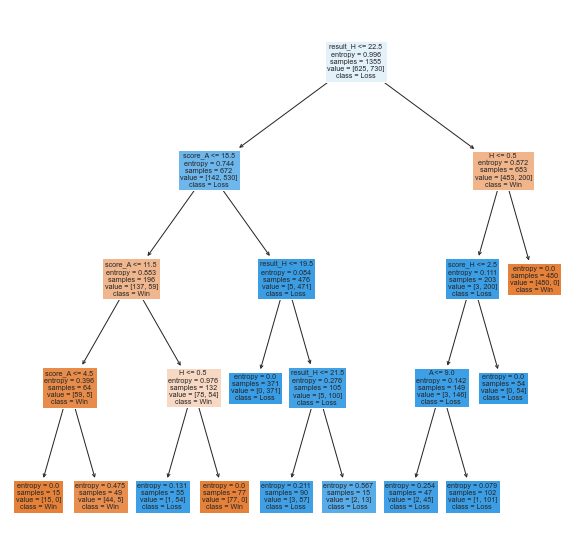

In [76]:
# Initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)
decision_tree.fit(X_dt_H, y_dt_H)

# Render the tree
features = past_5_OneHot.columns
features = features[0:7]

fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(decision_tree, feature_names = features, class_names = ['Win', 'Loss'], filled=True);

print('Accuracy: ', round(decision_tree.score(X_dt_H_test, y_dt_H_test),5))

Accuracy:  0.99631


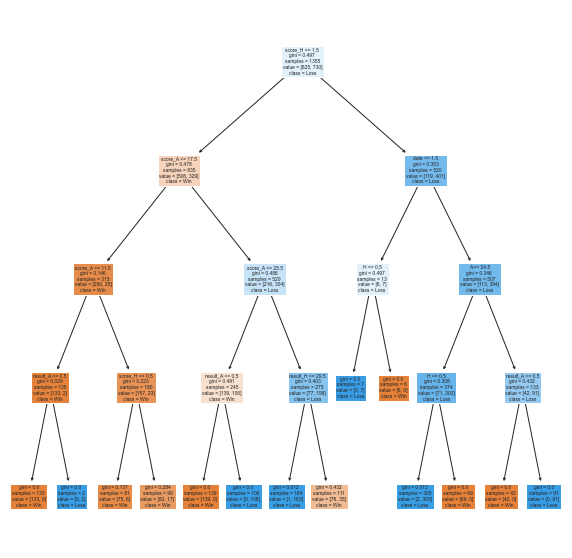

In [77]:
# Initialize and train the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=1,
    max_depth=4
)
decision_tree.fit(X_dt_H, y_dt_H)

# Render the tree
features = past_5_OneHot.columns
features = features[0:7]

fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(decision_tree, feature_names = features, class_names = ['Win', 'Loss'], filled=True);

print('Accuracy: ', round(decision_tree.score(X_dt_H_test, y_dt_H_test),5))

### Support Vector Machines

In [78]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score, plot_confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

svr = SVR()

col_past_5_A = ['A', 'score_A', 'to_A', 'total_yds_A', 'pen_num_A', 'pen_yds_A']
col_past_5_H = ['H', 'score_H', 'to_H', 'total_yds_H', 'pen_num_H', 'pen_yds_H']

X_A_svr = past_5_OneHot[col_past_5_A]
y_A_svr = past_5_OneHot['result_A']

X_A_svr_train, X_A_svr_test, y_A_svr_train, y_A_svr_test = train_test_split(X_A_svr, y_A_svr, test_size = 0.20)

In [79]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

Away

In [80]:
ml = svm.SVC()

# defining parameter range
param_grid = {'C': [ 1, 10, 100, 1000,10000], 
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']} 

grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv=15)

# fitting the model for grid search
grid_search=grid.fit(X_A_svr_train, y_A_svr_train)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


In [81]:
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [82]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Accuracy for our training dataset with tuning is : 75.92%


In [83]:
y_A_svr_test_hat = grid.predict(X_A_svr_test)
test_accuracy = accuracy_score(y_A_svr_test,y_A_svr_test_hat)*100
test_accuracy
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy for our testing dataset with tuning is : 74.91%


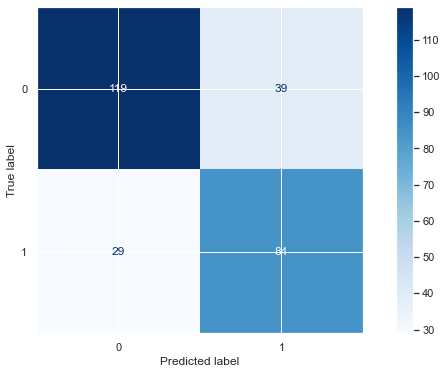

In [84]:
confusion_matrix(y_A_svr_test,y_A_svr_test_hat)
disp = plot_confusion_matrix(grid, X_A_svr_test, y_A_svr_test,cmap=plt.cm.Blues)

Home

In [85]:
X_H_svr = past_5_OneHot[col_past_5_H]
y_H_svr = past_5_OneHot['result_H']

X_H_svr_train, X_H_svr_test, y_H_svr_train, y_H_svr_test = train_test_split(X_H_svr, y_H_svr, test_size = 0.20)

ml = svm.SVC()

# defining parameter range
param_grid = {'C': [ 1, 10, 100, 1000,10000], 
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']} 

grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv=15)

# fitting the model for grid search
grid_search=grid.fit(X_H_svr_train, y_H_svr_train)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


In [86]:
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [87]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Accuracy for our training dataset with tuning is : 76.67%


In [88]:
y_H_svr_test_hat = grid.predict(X_H_svr_test)
test_accuracy = accuracy_score(y_H_svr_test,y_H_svr_test_hat)*100
test_accuracy
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy))

Accuracy for our testing dataset with tuning is : 74.54%


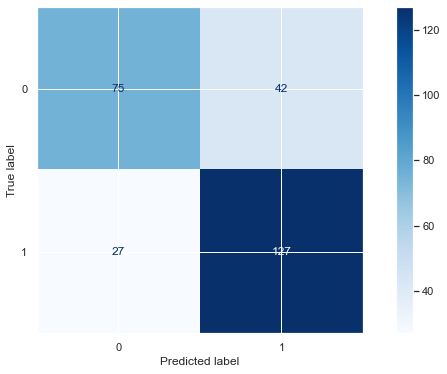

In [89]:
confusion_matrix(y_H_svr_test,y_H_svr_test_hat)
disp = plot_confusion_matrix(grid, X_H_svr_test, y_H_svr_test,cmap=plt.cm.Blues)

### Random Forest

Away

In [90]:
X_A_rf = past_5_OneHot[col_past_5_A]
y_A_rf = past_5_OneHot['result_A']

X_A_rf_train, X_A_rf_test, y_A_rf_train, y_A_rf_test = train_test_split(X_A_rf, y_A_rf, test_size=0.2, random_state=42)

In [91]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1)

print(f'{cross_val_score(rfc, X_A_rf, y_A_rf, cv=5)}\n')

[0.75276753 0.73431734 0.75645756 0.78228782 0.7601476 ]



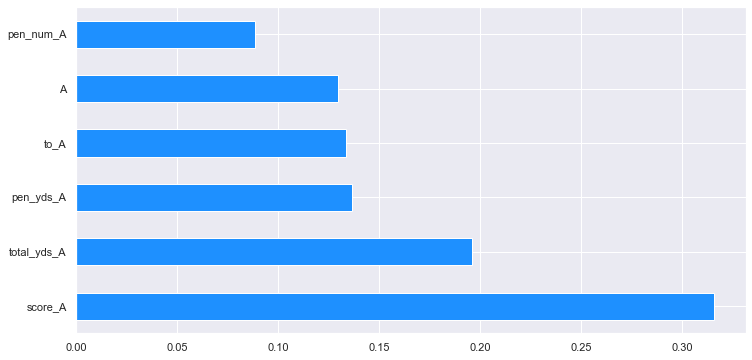

In [92]:
rfc.fit(X_A_rf, y_A_rf)

feat_importances = pd.Series(rfc.feature_importances_, index=X_A_rf.columns)
feat_importances.nlargest(20).plot(kind='barh', color=['dodgerblue']);

In [93]:
rf = RandomForestClassifier(criterion='entropy', 
                            n_estimators=100, 
                            random_state=42, 
                            max_depth=2, 
                            max_features=2,  
                            )
rf.fit(X_A_rf_train, y_A_rf_train)
y_A_pred_rf = rf.predict(X_A_rf_test)
cm_rf_A = confusion_matrix(y_A_rf_test,y_A_pred_rf)
print(cm_rf_A)
print(accuracy_score(y_A_rf_test,y_A_pred_rf))

[[108  38]
 [ 43  82]]
0.7011070110701108


In [94]:
params={'n_estimators':[10,20], 'max_depth':[None, 5], 'min_samples_split':[2,3]}
rfc = RandomForestClassifier(random_state=42)
clf_grid = GridSearchCV(rfc, params, cv=5, n_jobs=-1, verbose=1)
clf_grid.fit(X_A_rf, y_A_rf)
print(clf_grid.best_params_)
print(clf_grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 10}
0.766789667896679


In [95]:
from sklearn.metrics import precision_score, recall_score

rfc.fit(X_A_rf, y_A_rf)
print('Accuracy:  ', round(rfc.score(X_A_rf_test, y_A_rf_test),5))
y_A_rf_pred = rfc.predict(X_A_rf_test)
print('Precision: ', round(precision_score(y_A_rf_test,y_A_rf_pred),5))
print('Recall :   ', round(recall_score(y_A_rf_test,y_A_rf_pred),5))

Accuracy:   1.0
Precision:  1.0
Recall :    1.0


Home

In [96]:
X_H_rf = past_5_OneHot[col_past_5_H]
y_H_rf = past_5_OneHot['result_H']

X_H_rf_train, X_H_rf_test, y_H_rf_train, y_H_rf_test = train_test_split(X_H_rf, y_H_rf, test_size=0.2, random_state=42)

In [97]:
rfc = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1)

print(f'{cross_val_score(rfc, X_H_rf, y_H_rf, cv=5)}\n')

[0.76383764 0.78228782 0.77490775 0.74538745 0.75645756]



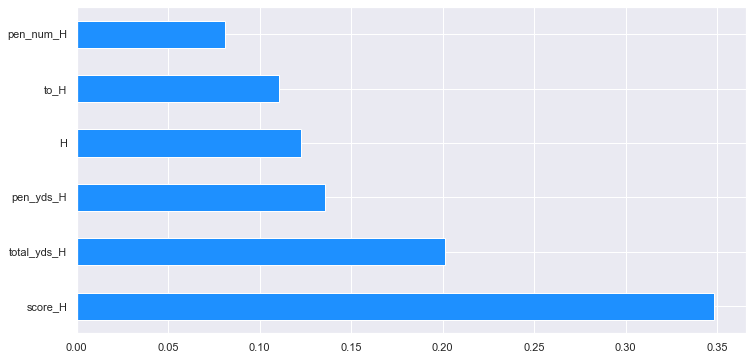

In [98]:
rfc.fit(X_H_rf, y_H_rf)

feat_importances = pd.Series(rfc.feature_importances_, index=X_H_rf.columns)
feat_importances.nlargest(20).plot(kind='barh', color=['dodgerblue']);

In [99]:
rf = RandomForestClassifier(criterion='entropy', 
                            n_estimators=100, 
                            random_state=42, 
                            max_depth=2, 
                            max_features=2,  
                            )
rf.fit(X_H_rf_train, y_H_rf_train)
y_H_pred_rf = rf.predict(X_H_rf_test)
cm_rf_H = confusion_matrix(y_H_rf_test,y_H_pred_rf)
print(cm_rf_H)
print(accuracy_score(y_H_rf_test,y_H_pred_rf))

[[ 84  42]
 [ 16 129]]
0.7859778597785978


In [100]:
params={'n_estimators':[10,20], 'max_depth':[None, 5], 'min_samples_split':[2,3]}
rfc = RandomForestClassifier(random_state=42)
clf_grid = GridSearchCV(rfc, params, cv=5, n_jobs=-1, verbose=1)
clf_grid.fit(X_H_rf, y_H_rf)
print(clf_grid.best_params_)
print(clf_grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
0.7830258302583026


In [101]:
rfc.fit(X_H_rf, y_H_rf)
print('Accuracy:  ', round(rfc.score(X_H_rf_test, y_H_rf_test),5))
y_H_rf_pred = rfc.predict(X_H_rf_test)
print('Precision: ', round(precision_score(y_H_rf_test,y_H_rf_pred),5))
print('Recall :   ', round(recall_score(y_H_rf_test,y_H_rf_pred),5))

Accuracy:   1.0
Precision:  1.0
Recall :    1.0


### Gradient Boosting

In [102]:
import itertools

In [103]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Parameters For Tuning:

* learning_rate
* max_depth
* n_estimators
* loss
* subsample
* min_samples_split
* max_features

Away

In [104]:
X_A_gb = past_5_OneHot[col_past_5_A]
y_A_gb = past_5_OneHot['result_A']

X_A_gb_train, X_A_gb_test, y_A_gb_train, y_A_gb_test = train_test_split(X_A_gb, y_A_gb, test_size=0.2, random_state=42)

In [105]:
params = {'n_estimators': 100,
          'max_depth': 4,
          'loss': 'deviance', 
          'learning_rate':0.4, 
          'subsample': 0.4, 
          'min_samples_split': 50, 
          'max_features': 4}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_A_gb_train, y_A_gb_train)

predict_train = clf.predict(X_A_gb_train)
predict_test = clf.predict(X_A_gb_test)

Confusion matrix, without normalization


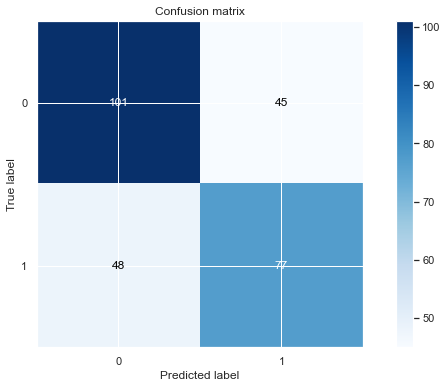

In [106]:
cm = confusion_matrix(y_A_gb_test, predict_test)
plot_confusion_matrix(cm,[0,1],False);

In [2]:
print('Accuracy:  ', round(clf.score(X_A_gb_test, y_A_gb_test),5))
y_A_gb_pred = clf.predict(X_A_gb_test)
print('Precision: ', round(precision_score(y_A_gb_test,y_A_gb_pred),5))
print('Recall :   ', round(recall_score(y_A_gb_test,y_A_gb_pred),5))

NameError: name 'clf' is not defined